[1] "time"            "grid_latitude"   "grid_longitude"  "ensemble_member"
[5] "bnds"            "string27"        "string64"

ERROR: Error in image.default(..., breaks = breaks, add = add, col = col): dimensions of z are not length(x)(-1) times length(y)(-1)


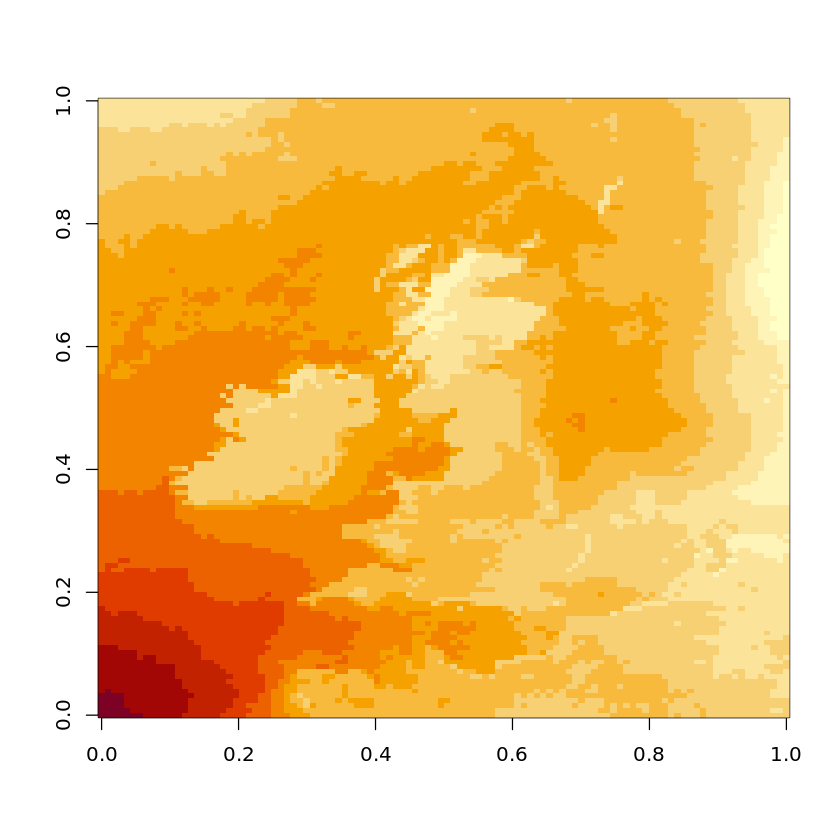

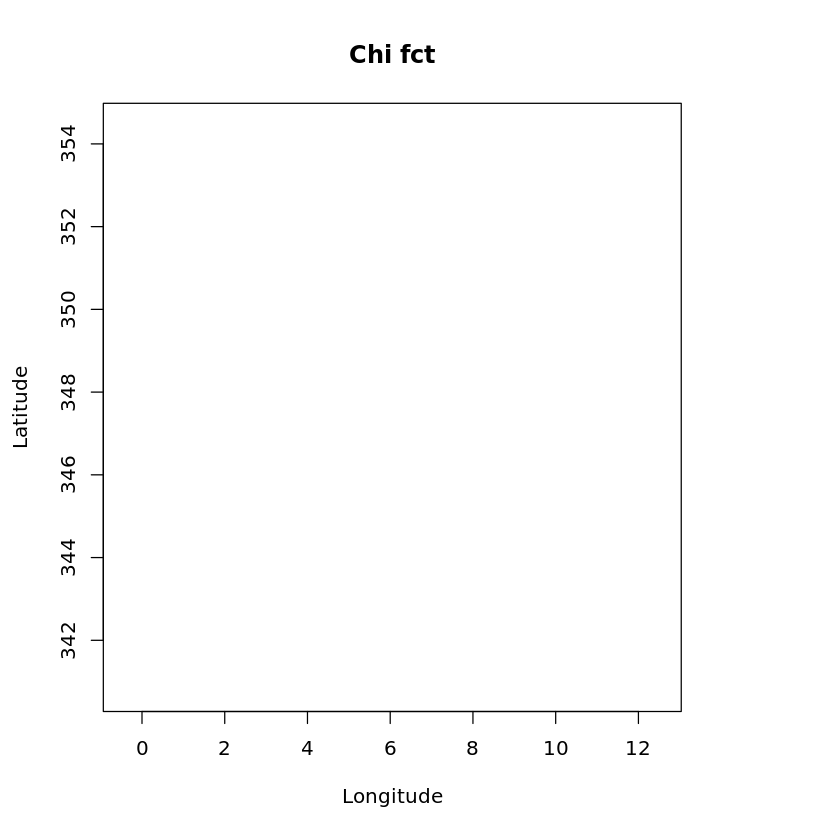

In [34]:
# exports
library(ncdf4)                  # needed to read netcdf data
library(ncdf4.helpers)          # additional support functions for netcdf data
library(fields)                 # provides image.plot()
library(rgdal)                  # load shapefiles
library(extRemes) # package for extreme value analysis
library(dplyr)

setwd("~/UKCP18/ukcp-other/extremal-dependence-data/")
# filename
fnm <- "tasmax_rcp85_land-rcm_uk_12km-rll_01_day_20201201-20301130.nc"

# open a connection to the netcdf file
nc <- nc_open(fnm)

# tasmax data
tasmax <- ncvar_get(nc, "tasmax")
attributes(nc$dim)$names
nc_lat <- ncvar_get( nc, attributes(nc$dim)$names[2])
nc_long <- ncvar_get( nc, attributes(nc$dim)$names[3])
dimnames(tasmax) <- list("rlon" = ncvar_get(nc, "grid_longitude") - 360,
                      "rlat" = ncvar_get(nc, "grid_latitude"),
                      "date" = substr(nc.get.time.series(nc, "tasmax"),1,10))


# ref point 
x_ref<-tasmax[1,1,]

# treshold
u=0.05

date_start = "2021-01-01"
date_end = "2030-01-01"

# chi_matrix

res=matrix(0, 108, 128)
for(i in 1:108){
    for (j in 1:128){
        res[i,j]=taildep(-x_ref, -tasmax[i,j,], u, type = "chi", na.rm = FALSE)
        #res[i,j]=taildep(-x_ref, -tasmax[i,j,start:end], u, type = "chi", na.rm = FALSE)
    }
}

# Plot in R
image(res)
# load the shapefile - this will produce a warning message about a discarded datum, which you can safely ignore
osgbmap <- readOGR("ukcp18-uk-land-rll-united_kingdom-hires.geojson", verbose = F)

image.plot(x = as.numeric(nc_long), y = as.numeric(nc_lat), res, asp = T, 
           xlab = "Longitude", ylab = "Latitude", main = "Chi fct")   
sp::plot(osgbmap, add = T)